In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer

In [2]:
def concat_table(name_list):
    table_group = []
    for name in name_list:
        table = pd.read_sas(name)
        table_group.append(table)
    return pd.concat(table_group, sort = True)

In [3]:
slq_list = ['SLQ_D.XPT','SLQ_E.XPT','SLQ_F.XPT','SLQ_G.XPT']
slq = concat_table(slq_list)

bpx_list = ['BPX_D.XPT','BPX_E.XPT','BPX_F.XPT','BPX_G.XPT']
bpx = concat_table(bpx_list)

demo_list = ['DEMO_D.XPT','DEMO_E.XPT','DEMO_F.XPT','DEMO_G.XPT']
demo = concat_table(demo_list)

dr1_list = ['DR1TOT_D.XPT','DR1TOT_E.XPT','DR1TOT_F.XPT','DR1TOT_G.XPT']
dr1 = concat_table(dr1_list)

duq_list = ['DUQ_D.XPT','DUQ_E.XPT','DUQ_F.XPT','DUQ_G.XPT']
duq = concat_table(duq_list)

dpq_list = ['DPQ_D.XPT','DPQ_E.XPT','DPQ_F.XPT','DPQ_G.XPT']
dpq = concat_table(dpq_list)

smq_list = ['SMQ_D.XPT','SMQ_E.XPT','SMQ_F.XPT','SMQ_G.XPT','SMQ_H.XPT']
smq = concat_table(smq_list)

In [4]:
# merge dataframes
data_org = slq.merge(bpx, how = 'inner', on = 'SEQN').\
        merge(demo, how = 'inner', on = 'SEQN').\
        merge(dr1, how = 'inner', on = 'SEQN').\
        merge(duq, how = 'inner', on = 'SEQN').\
        merge(dpq, how = 'inner', on = 'SEQN').\
        merge(smq, how = 'inner', on = 'SEQN')

In [5]:
len(data_org)

18008

In [6]:
#missing value
def miss_num(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:
missing_data = miss_num(data_org)

In [8]:
sum(missing_data['Percent'] <= 0.2)

156

In [9]:
# get selected features
features = pd.DataFrame(missing_data['Percent'] <= 0.2)
features = features.index[features['Percent'] == True].tolist()

# get dataset with only selected features
data = data_org[features]
print(data.shape)

(18008, 156)


In [10]:
data.dtypes

INDHHIN2    float64
INDFMIN2    float64
WTDR2D      float64
DUQ370      float64
DUQ240      float64
DPQ090      float64
DPQ080      float64
DPQ070      float64
DPQ060      float64
DPQ050      float64
DPQ040      float64
DPQ030      float64
DPQ020      float64
DPQ010      float64
MIAINTRP    float64
MIALANG     float64
MIAPROXY    float64
BPXSY3      float64
BPXDI3      float64
BPXDI1      float64
BPXSY1      float64
BPXSY2      float64
BPXDI2      float64
INDFMPIR    float64
DR1HELPD    float64
DR1TATOA    float64
DR1BWATZ    float64
DR1MNRSP    float64
DR1TACAR    float64
DR1TALCO    float64
             ...   
FIALANG     float64
FIAINTRP    float64
FIAPROXY    float64
SLD010H     float64
DMDCITZN    float64
SIAINTRP    float64
SIALANG     float64
SIAPROXY    float64
SLQ050      float64
SLQ060      float64
SMD100BR     object
SMDUPCA      object
SMAQUEX2    float64
SDMVSTRA    float64
DR1DRSTZ    float64
WTMEC2YR    float64
WTINT2YR    float64
SDMVPSU     float64
SDDSRVYR    float64


## Correlation Heatmap

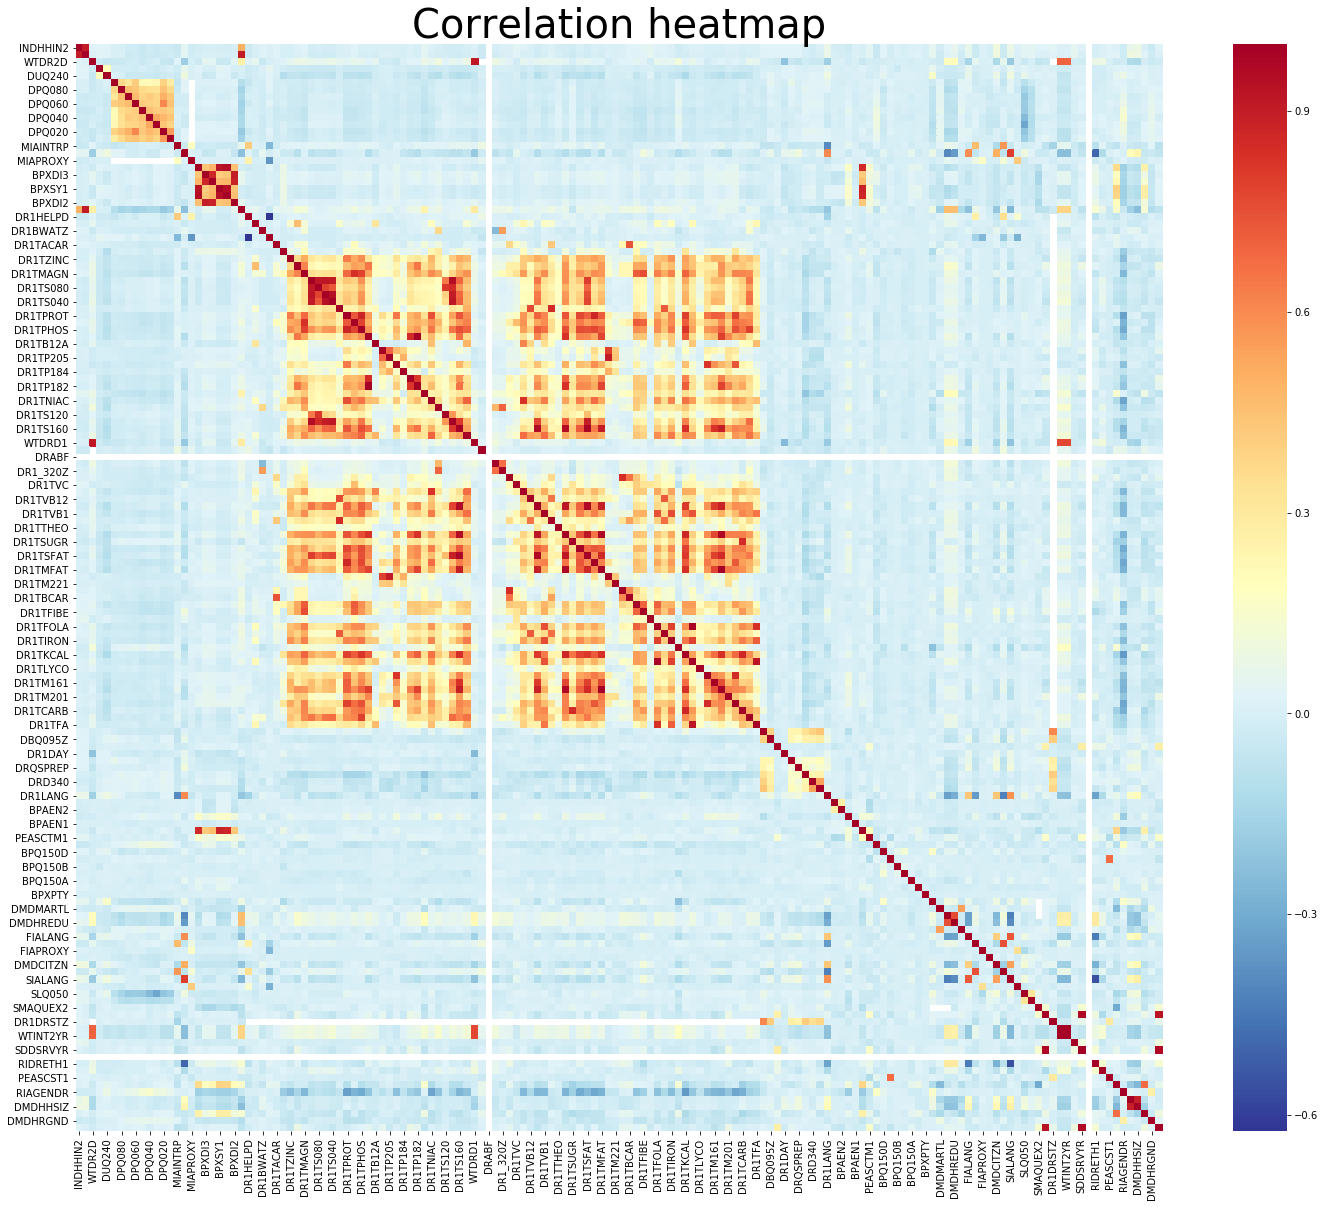

In [11]:
corrmat = data.iloc[:, :].corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corrmat, cmap = plt.cm.RdYlBu_r, vmax=1, square=True)
plt.title('Correlation heatmap', fontsize = 40)
plt.show()

Text(0,0.5,'Correlation')

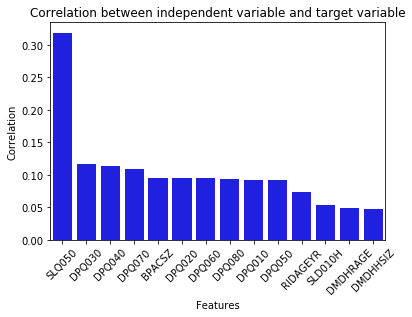

In [12]:
correlation = pd.DataFrame(abs(corrmat['SLQ060']).sort_values(ascending = False))
correlation = correlation.reset_index()
sns.barplot(x = 'index', y = 'SLQ060', data = correlation.iloc[1:15,], color = 'blue')
plt.xticks(rotation = 45)
plt.title("Correlation between independent variable and target variable")
plt.xlabel('Features')
plt.ylabel('Correlation')

In [13]:
abs(corrmat['SLQ060']).sort_values()

DR1TS180    0.000066
DR1TS040    0.000176
DR1HELPD    0.000300
DR1TVB12    0.000317
DBQ095Z     0.000372
BPQ150D     0.000600
DR1TSFAT    0.000753
DR1TVB2     0.001090
DR1TP184    0.001337
DR1TS060    0.001865
DR1TCOPP    0.002122
DR1BWATZ    0.002274
BPAEN3      0.002460
DR1TM161    0.002835
DR1TS160    0.002932
DR1TNUMF    0.003154
DR1TCALC    0.003302
DR1TCRYP    0.003582
DR1TLYCO    0.003845
WTDR2D      0.004033
DR1TRET     0.004070
MIAPROXY    0.004190
DR1MNRSP    0.004341
BPXPTY      0.004468
DR1TS080    0.004870
DR1TB12A    0.004967
BPQ150B     0.005031
DR1EXMER    0.005122
BPAEN2      0.005138
DR1TIRON    0.005220
              ...   
BPXSY1      0.032550
FIALANG     0.033645
SIALANG     0.034515
BPXSY2      0.035660
DPQ090      0.036247
DRQSDIET    0.037709
DMDCITZN    0.040023
DMDFMSIZ    0.040123
PEASCTM1    0.040599
INDFMIN2    0.041585
FIAPROXY    0.042174
INDHHIN2    0.044139
SMQ020      0.044612
DMDHHSIZ    0.047849
DMDHRAGE    0.048436
SLD010H     0.053714
RIDAGEYR    0

## Data Processing

In [14]:
feature_sel = corrmat.loc[(corrmat['SLQ060']>0.03) | (corrmat['SLQ060']< -0.03)].index
data_sel = data[feature_sel]
print(data_sel.shape)
print(feature_sel)

(18008, 32)
Index(['INDHHIN2', 'INDFMIN2', 'DPQ090', 'DPQ080', 'DPQ070', 'DPQ060',
       'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020', 'DPQ010', 'MIALANG', 'BPXSY1',
       'BPXSY2', 'DR1TCAFF', 'DRQSDIET', 'BPACSZ', 'BPXML1', 'PEASCTM1',
       'SMQ020', 'FIALANG', 'FIAPROXY', 'SLD010H', 'DMDCITZN', 'SIALANG',
       'SLQ050', 'SLQ060', 'SMAQUEX2', 'RIDAGEYR', 'DMDFMSIZ', 'DMDHHSIZ',
       'DMDHRAGE'],
      dtype='object')


In [15]:
age = pd.DataFrame(data_sel['RIDAGEYR'].describe())
age.rename(columns = {'RIDAGEYR': 'Age'})

,Age
count,18008.000000
mean,42.010662
std,14.376739
min,18.000000
25%,30.000000
50%,42.000000
75%,54.000000
max,69.000000


In [16]:
c = pd.DataFrame(data_sel['DPQ060'].describe())
c.rename(columns = {'DPQ060': 'Feeling bad about yourself?'})

,Feeling bad about yourself?
count,1.608700e+04
mean,2.894884e-01
std,7.143601e-01
min,5.397605e-79
25%,5.397605e-79
50%,5.397605e-79
75%,5.397605e-79
max,9.000000e+00


In [17]:
c = pd.DataFrame(data_sel['DPQ030'].describe())
c.rename(columns = {'DPQ030': 'Feeling bad about yourself?'})

,Feeling bad about yourself?
count,1.609000e+04
mean,6.512741e-01
std,9.731398e-01
min,5.397605e-79
25%,5.397605e-79
50%,5.397605e-79
75%,1.000000e+00
max,9.000000e+00


In [18]:
data_sel['SLD010H'].describe()

count    17995.000000
mean         6.880745
std          3.452983
min          1.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         99.000000
Name: SLD010H, dtype: float64

In [19]:
a = pd.DataFrame(data = data_sel['SLD010H'].describe())
a.rename(columns = {'SLD010H': 'Sleep hours'})

,Sleep hours
count,17995.000000
mean,6.880745
std,3.452983
min,1.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,99.000000


In [20]:
# missing values
num_missing = data_sel.isnull().sum()
perc_missing = data_sel.isnull().sum() / len(data_sel)
d = {'Number of missing values': num_missing, 'Percentage of missing value': 
     (100. * perc_missing).round(0).astype(str) + '%'}
perc_missing = pd.DataFrame(data = d)

perc_missing.head(5)

,Number of missing values,Percentage of missing value
INDHHIN2,3398,19.0%
INDFMIN2,3374,19.0%
DPQ090,1924,11.0%
DPQ080,1921,11.0%
DPQ070,1921,11.0%


In [21]:
# convert categorical variables
categorical = ['INDHHIN2', 'INDFMIN2', 'DPQ090', 'DPQ070', 'DPQ080', 'DPQ060',
       'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020', 'DPQ010', 'MIALANG', 'DRQSDIET', 'BPACSZ',
       'SMQ020', 'FIALANG', 'FIAPROXY', 'DMDCITZN', 'SIALANG',
       'SLQ050', 'SLQ060', 'SMAQUEX2']
numerical = ['BPXSY1', 'BPXSY2', 'DR1TCAFF', 'BPXML1', 'PEASCTM1', 'SLD010H',
            'RIDAGEYR', 'DMDHRAGE', 'DMDHHSIZ', 'DMDFMSIZ']
data_cat = data_sel[categorical]
data_cat = data_cat.round(0)
# filter out unlabeled data
data_cat = pd.concat([data_cat[data_cat['SLQ060'] == 1], data_cat[data_cat['SLQ060'] == 2]], axis = 0)
data_cat.head(5)

,INDHHIN2,INDFMIN2,DPQ090,DPQ070,DPQ080,DPQ060,DPQ050,DPQ040,DPQ030,DPQ020,...,DRQSDIET,BPACSZ,SMQ020,FIALANG,FIAPROXY,DMDCITZN,SIALANG,SLQ050,SLQ060,SMAQUEX2
2,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
8,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
23,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,...,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
25,NaN,NaN,0.0,2.0,0.0,2.0,2.0,2.0,1.0,3.0,...,2.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


In [22]:
data_cat = data_cat.astype('category')
data_sel = pd.concat([data_cat, data_sel[numerical]], axis = 1)
data_sel.head(5)

,INDHHIN2,INDFMIN2,DPQ090,DPQ070,DPQ080,DPQ060,DPQ050,DPQ040,DPQ030,DPQ020,...,BPXSY1,BPXSY2,DR1TCAFF,BPXML1,PEASCTM1,SLD010H,RIDAGEYR,DMDHRAGE,DMDHHSIZ,DMDFMSIZ
0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,144.0,140.0,13.0,160.0,827.0,9.0,44.0,36.0,4.0,4.0
1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,116.0,118.0,10.0,150.0,13.0,8.0,21.0,21.0,6.0,6.0
2,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,136.0,144.0,249.0,160.0,787.0,2.0,59.0,60.0,2.0,2.0
3,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,94.0,96.0,39.0,140.0,591.0,8.0,27.0,27.0,5.0,5.0
4,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,120.0,118.0,218.0,130.0,747.0,7.0,44.0,44.0,2.0,2.0


In [23]:
# filter out NA values
data_clean = data_sel.dropna()
# label the data according to SLQ060
def label(row):
    if row['SLQ060'] == 1 :
        return 'Sleep disorder'
    if row['SLQ060'] == 2:
        return 'No sleep disorder'
data_clean['diagnosis'] = data_clean.apply(lambda row: label(row), axis = 1)
data_clean['SLQ060'] = data_clean['SLQ060'].replace(2, 0)
# len(data_clean)
data_clean.head(5)

/Users/josephzeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/josephzeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,INDHHIN2,INDFMIN2,DPQ090,DPQ070,DPQ080,DPQ060,DPQ050,DPQ040,DPQ030,DPQ020,...,BPXSY2,DR1TCAFF,BPXML1,PEASCTM1,SLD010H,RIDAGEYR,DMDHRAGE,DMDHHSIZ,DMDFMSIZ,diagnosis
3285,6.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,122.0,5.490000e+02,150.0,612.0,6.0,62.0,64.0,2.0,2.0,No sleep disorder
3286,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,108.0,3.000000e+00,140.0,620.0,6.0,52.0,52.0,5.0,5.0,No sleep disorder
3287,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,104.0,5.397605e-79,140.0,533.0,6.0,21.0,51.0,4.0,4.0,No sleep disorder
3288,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,114.0,4.000000e+00,150.0,561.0,8.0,64.0,37.0,6.0,6.0,No sleep disorder
3289,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112.0,7.000000e+01,140.0,748.0,5.0,66.0,55.0,3.0,3.0,No sleep disorder


In [24]:
len(data_clean)

11185

## EDA

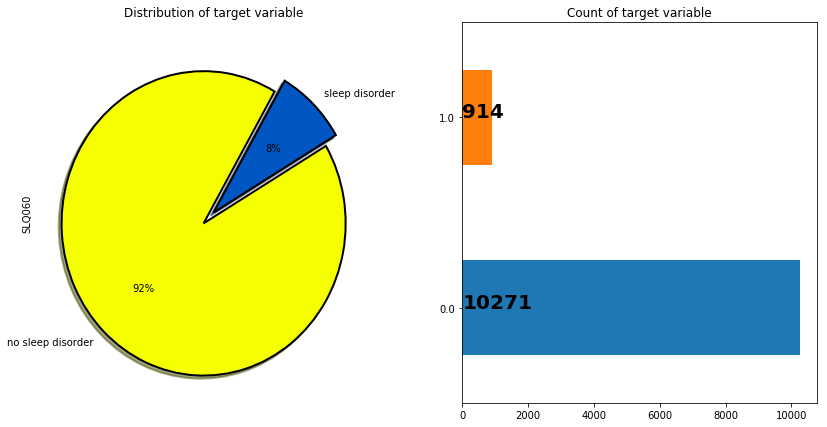

In [25]:
#Distribution of target variable
plt.figure(figsize=(14,7))
plt.subplot(121)
data_clean['SLQ060'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["no sleep disorder","sleep disorder"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = data_clean['SLQ060'].value_counts().plot(kind="barh")

for i,j in enumerate(data_clean['SLQ060'].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

In [26]:
# take a sample to do EDA
data_pos = data_clean[data_clean['SLQ060'] == 1]
data_neg = data_clean[data_clean['SLQ060'] == 0]
sample_pos = data_pos.sample(300)
sample_neg = data_neg.sample(300)
sample = pd.concat([sample_pos, sample_neg], axis = 0)

In [27]:
len(data_pos)

914

In [28]:
len(data_neg)

10271

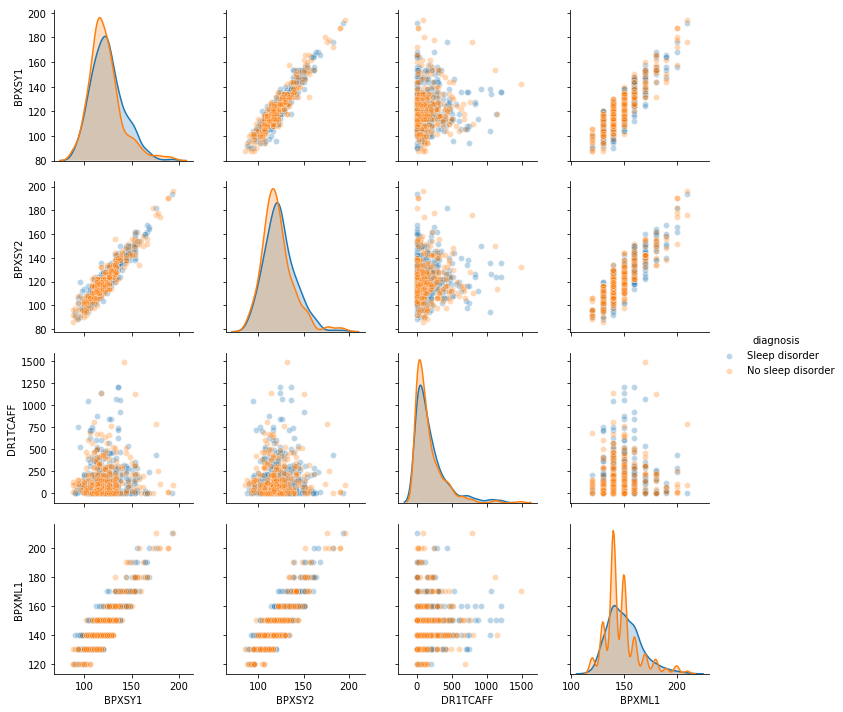

In [29]:
# correlation between numerical variables
index_num = numerical[0:4]+['diagnosis']
sample_num = sample[index_num]
sns.pairplot(sample_num, hue = 'diagnosis', plot_kws = {'alpha': 0.3})

In [30]:
# plot distribution of variables
def plot_dist(pos, neg, var, xlabel, title):
    # sns.distplot(data_pos["DPQ070"] , color="skyblue", label="Yes")
    # sns.distplot(data_pos["DPQ070"] , color="red", label="No")

    # plt.show()
    weights_pos = np.ones_like(pos[var]) / len(pos[var])
    weights_neg = np.ones_like(neg[var]) / len(neg[var])
    # plt.hist(sample_pos['DPQ060'], label = ['Yes', 'No'], weights = weights_pos)
    # plt.hist(sample_neg['DPQ060'], label = ['Yes', 'No'], weights = weights_neg)
    plt.hist([pos[var], neg[var]], label = ['Sleep disorder', 'No sleep disorder'], 
             weights = [weights_pos, weights_neg])
    plt.legend()
    plt.xlim(0, len(xlabel)+1)
    y_pos = np.arange(len(xlabel)) + 0.5
    plt.xticks(y_pos, xlabel,rotation='vertical')
    plt.title(title)

### SLQ050 -- 0.319

(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

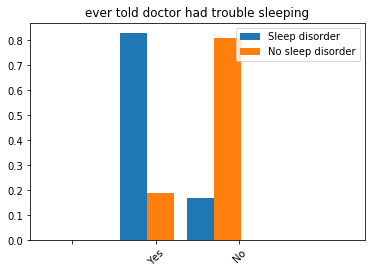

In [31]:
# index_cat = ['DPQ090', 'DPQ070', 'DPQ080', 'DPQ060',
#        'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020', 'DPQ010']
# ever told doctor had trouble sleeping
bars = ('','Yes', 'No')
title = 'ever told doctor had trouble sleeping'
plot_dist(data_pos, data_neg, 'SLQ050', bars, title)
plt.xticks(rotation = 45)

### Feature distribution: DPQ030 & DPQ040

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

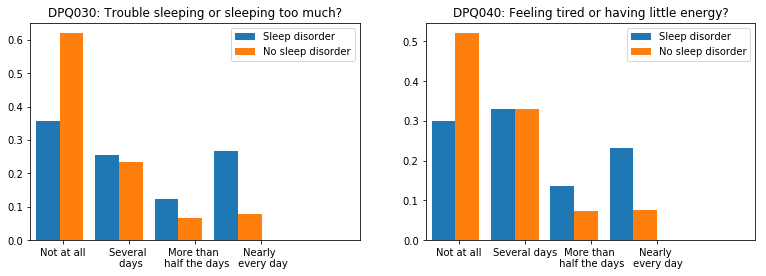

In [32]:
plt.figure(figsize=(13,4))
plt.subplot(121)

# trouble sleeping/sleeping too much
bars = ('Not at all', 'Several \n days', 'More than \n half the days', \
        'Nearly \n every day')
title = 'DPQ030: Trouble sleeping or sleeping too much?'
plot_dist(data_pos, data_neg, 'DPQ030', bars, title)
plt.xticks(rotation = 0)


plt.subplot(122)
# feeling tired
bars = ('Not at all', 'Several days', 'More than \n half the days', \
        'Nearly \n every day')
title = 'DPQ040: Feeling tired or having little energy?'
plot_dist(data_pos, data_neg, 'DPQ040', bars, title)
plt.xticks(rotation = 0)

### Feature distribution: DPQ070

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

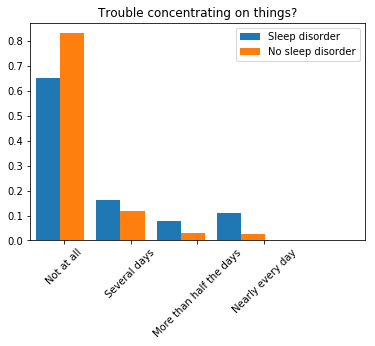

In [33]:
# trouble concentrating
bars = ('Not at all', 'Several days', 'More than half the days', \
        'Nearly every day')
title = 'Trouble concentrating on things?'
plot_dist(data_pos, data_neg, 'DPQ070', bars, title)
plt.xticks(rotation = 45)

### Feature distribution: RIDAGEYR

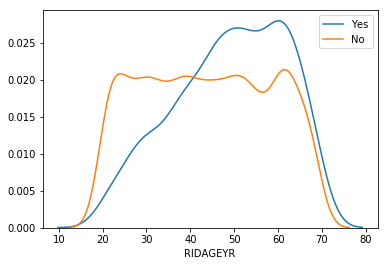

In [34]:
# age at screening adjudicated
sns.distplot(data_pos['RIDAGEYR'], bins = 10, label = 'Yes', hist = False)
sns.distplot(data_neg['RIDAGEYR'], bins = 10, label = 'No', hist = False)
plt.legend()

### Feature distribution: SLD010H

/Users/josephzeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/josephzeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


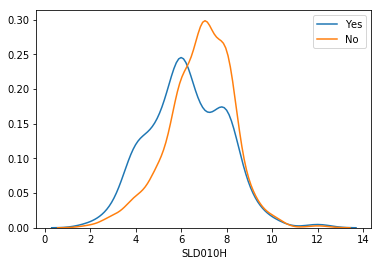

In [35]:
# how much sleep do you get
sample_pos_slp = sample_pos[data_pos['SLD010H'] <= 12]
sample_neg_slp = sample_neg[data_neg['SLD010H'] <= 12]
sns.distplot(sample_pos_slp['SLD010H'], bins = 20, label = 'Yes', hist = False)
sns.distplot(sample_neg_slp['SLD010H'], bins = 20, label = 'No', hist = False)
plt.legend()